# IMPORT DATA

In [1]:
import numpy as np      
import pandas as pd       
import matplotlib.pyplot as plt 
import scipy.cluster.hierarchy as sch


In [2]:
df=pd.read_csv("/Users/admin/UOP AMLDM/Untitled Folder/Mall_Customers.csv")

# DATA UNDERSTANDING

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# DATA PREPROCESSING 

In [5]:
sdf= df.iloc[:, [3, 4]]
sdf

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [6]:
sdf = sdf.values

# DATA MODELLING

# Hierachical Clustering

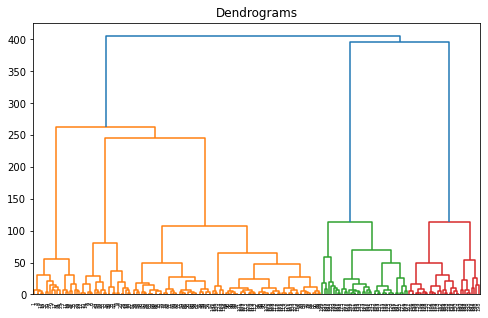

In [7]:
plt.figure(figsize=(8, 5)) 
plt.title("Dendrograms") 
dendrogram = sch.dendrogram(sch.linkage(sdf, method = 'ward'))

In [8]:
from sklearn.cluster import AgglomerativeClustering

In [9]:
hc= AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

In [10]:
test_hc = hc.fit_predict(sdf)
test_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

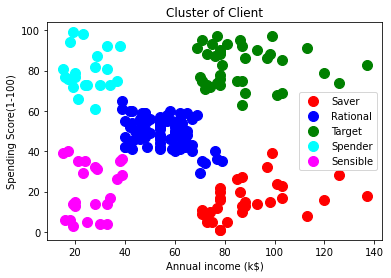

In [12]:
plt.scatter(sdf[test_hc == 0, 0], sdf[test_hc == 0, 1], s=100, c='red', label = 'Saver')
plt.scatter(sdf[test_hc == 1, 0], sdf[test_hc == 1, 1], s=100, c='blue', label = 'Rational')
plt.scatter(sdf[test_hc == 2, 0], sdf[test_hc == 2, 1], s=100, c='green', label = 'Target')
plt.scatter(sdf[test_hc == 3, 0], sdf[test_hc == 3, 1], s=100, c='cyan', label = 'Spender')
plt.scatter(sdf[test_hc == 4, 0], sdf[test_hc == 4, 1], s=100, c='magenta', label = 'Sensible')
plt.title('Cluster of Client')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()


In [13]:
from pandas import Series, DataFrame
df['cluster group'] = Series(test_hc, index=df.index)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [14]:
df['cluster group'].value_counts()


1    85
2    39
0    32
4    23
3    21
Name: cluster group, dtype: int64

# K-MEAN


In [15]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [16]:
mdf = df.iloc[:,[3,4]].values

In [17]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(mdf)
    wcss.append(kmeans.inertia_)

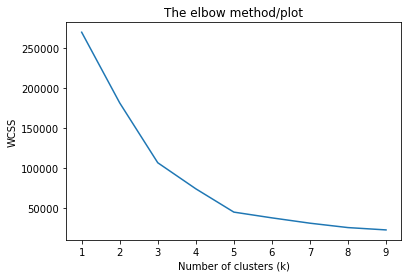

In [18]:
plt.plot(range(1,10), wcss)
plt.title('The elbow method/plot')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=5)
kmeans_model = kmeans.fit(mdf) 

test_kmeans = kmeans_model.predict(mdf)
test_kmeans 

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [20]:
kmeans_model.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

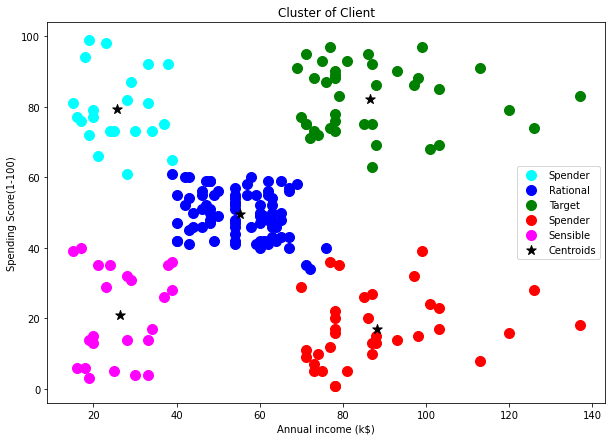

In [27]:
plt.figure(figsize=(10,7))

plt.scatter(mdf[test_kmeans==0,0], mdf[test_kmeans==0,1], s=100, c='cyan', label='Spender')
plt.scatter(mdf[test_kmeans==1,0], mdf[test_kmeans==1,1], s=100, c='blue', label='Rational')
plt.scatter(mdf[test_kmeans==2,0], mdf[test_kmeans==2,1], s=100, c='green', label='Target')
plt.scatter(mdf[test_kmeans==3,0], mdf[test_kmeans==3,1], s=100, c='red', label='Spender')
plt.scatter(mdf[test_kmeans==4,0], mdf[test_kmeans==4,1], s=100, c='magenta', label='Sensible')

# Cluster Centroids
plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1],s=100, c='black',marker='*', label='Centroids')
plt.title('Cluster of Client')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

In [22]:
kmeans_model.predict([[5,90]])

array([0])

In [23]:
silhouette_score(mdf,test_kmeans)

0.553931997444648

In [24]:
df['K mean cluster'] = Series(test_kmeans, index=df.index)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster group,K mean cluster
0,1,Male,19,15,39,4,4
1,2,Male,21,15,81,3,0
2,3,Female,20,16,6,4,4
3,4,Female,23,16,77,3,0
4,5,Female,31,17,40,4,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,2
196,197,Female,45,126,28,0,3
197,198,Male,32,126,74,2,2
198,199,Male,32,137,18,0,3


In [25]:
df['K mean cluster'].value_counts()

1    81
2    39
3    35
4    23
0    22
Name: K mean cluster, dtype: int64